In [1]:
#### read TCGA_COAD data ####
COAD_UCSC_Toil_tpm_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/UCSC_Toil/COAD_UCSC_Toil_tpm_dataset.rds")
COAD_RSEM_gene_tpm <- COAD_UCSC_Toil_tpm_dataset$COAD.RSEM.gene.tpm
gencode.v23.annotation <- COAD_UCSC_Toil_tpm_dataset$gencode.v23.annotation
COAD.pheno <- COAD_UCSC_Toil_tpm_dataset$COAD.pheno
head(gencode.v23.annotation)
## convert ensembleID to symbol 
geneMatch <- match(rownames(COAD_RSEM_gene_tpm),gencode.v23.annotation$V1)
geneSymbol <- as.character(gencode.v23.annotation[geneMatch,]$V2)
COAD_tpm_symbol <- COAD_RSEM_gene_tpm
rownames(COAD_tpm_symbol) <- geneSymbol
head(COAD_tpm_symbol)

### Phenotype Update
### Seperate the Normal and Tumor samples
sampleID<- as.character(COAD.pheno$sample)
table(unlist(lapply(strsplit(sampleID,"-"), '[[', 4)))
sampleTypes <- unlist(lapply(strsplit(sampleID,"-"), '[[', 4))
sampleTypes[sampleTypes=="01"]<- "Tumor"
sampleTypes[sampleTypes=="11"]<- "Nomal"
COAD.pheno <- cbind(COAD.pheno , sampleTypes)

V1,V2,V3,V4,V5,V6
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
id,gene,chrom,chromStart,chromEnd,strand
ENSG00000223972.5,DDX11L1,chr1,11869,14409,+
ENSG00000227232.5,WASH7P,chr1,14404,29570,-
ENSG00000278267.1,MIR6859-1,chr1,17369,17436,-
ENSG00000243485.3,RP11-34P13.3,chr1,29554,31109,+
ENSG00000274890.1,MIR1302-2,chr1,30366,30503,+


,TCGA.F4.6854.01,TCGA.D5.5538.01,TCGA.AA.3511.01,TCGA.QG.A5YX.01,TCGA.G4.6320.01,TCGA.CM.6164.01,TCGA.A6.A567.01,TCGA.AA.3516.11,TCGA.DM.A0X9.01,TCGA.AY.A69D.01,⋯,TCGA.DM.A28C.01,TCGA.DM.A0XD.01,TCGA.DM.A282.01,TCGA.CM.4744.01,TCGA.AZ.6605.01,TCGA.AZ.6601.01,TCGA.AY.A71X.01,TCGA.AA.3675.01,TCGA.A6.6782.01,TCGA.CM.4751.01
RP11-368I23.2,0.000000,0.000000,0.04000092,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000000,0.00000,⋯,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.02999974,0.000000000
RP11-167B3.1,0.000000,0.000000,0.00000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000000,0.00000,⋯,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000000,0.000000000
RP11-742D12.2,0.000000,0.000000,0.00000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.009999639,0.00000,⋯,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000000,0.009999639
RAB4B,22.880346,17.390374,29.51039064,26.35026,31.029177,30.770012,33.929246,66.730684,37.190473435,30.65080,⋯,16.030083,24.019595,28.659661,32.058944,27.30981,39.848784,25.800803,20.61939,28.05038308,41.151266913
AC104071.1,0.000000,0.000000,0.00000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000000,0.00000,⋯,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000000,0.000000000
TIGAR,7.519872,6.520031,8.81974188,10.56019,2.540006,6.270019,8.449871,6.659821,12.129776531,15.28988,⋯,7.390156,5.469983,6.810158,9.960065,10.06976,5.699941,5.980055,5.60006,9.26020552,10.700194956



 01  02  06  11 
286   1   1  41 

In [2]:
## Read scReference 
#### Reading data
### 1.Read the reference scRNA data
###
scReference.V1 <- readRDS("/data8t_4/JH/MyJobs/Normal_cell_reference/Step2_Merge_and_Filter_the_scReference/2019_11_16_scReference.V1.rds")
scReference.list <- scReference.V1$scReference.list
### 2.Reference data transformation
#### Reference transformation 
#### log10(x+1) transformed the same as COAD data
log10.scReference.list.CV.8000 <- lapply(scReference.V1[["scReference.list.CV.8000"]], function(x){
  log10.x <- log10(x+1)
  return(log10.x)
})

log10.scReference.list.CV.4000 <- lapply(scReference.V1[["scReference.list.CV.4000"]], function(x){
  log10.x <- log10(x+1)
  return(log10.x)
})
log10.scReference.list.CV.2000 <- lapply(scReference.V1[["scReference.list.CV.2000"]], function(x){
  log10.x <- log10(x+1)
  return(log10.x)
})

log10.scReference.list.CV.1500 <- lapply(scReference.V1[["scReference.list.CV.1500"]], function(x){
  log10.x <- log10(x+1)
  return(log10.x)
})

log10.scReference.list.CV.1000 <- lapply(scReference.V1[["scReference.list.CV.1000"]], function(x){
  log10.x <- log10(x+1)
  return(log10.x)
})

In [3]:
### Distance calculation
##### Distance calculation 
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/refCorMerge.R")
### 
##### Transform COAD data
summary(colSums(COAD_tpm_symbol)) ### So its not log2 transformed
# Expression data transformation Log(2+0.001)
Log10.expList <- list(COAD_tpm_symbol = log10(COAD_tpm_symbol+1))
Cor.Res.CV8000 <- refCorMerge(Log10.expList, log10.scReference.list.CV.8000)
Cor.Res.CV4000 <- refCorMerge(Log10.expList, log10.scReference.list.CV.4000)
Cor.Res.CV2000 <- refCorMerge(Log10.expList, log10.scReference.list.CV.2000)
Cor.Res.CV1500 <- refCorMerge(Log10.expList, log10.scReference.list.CV.1500)
Cor.Res.CV1000 <- refCorMerge(Log10.expList, log10.scReference.list.CV.1000)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1e+06   1e+06   1e+06   1e+06   1e+06   1e+06 

[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"


Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


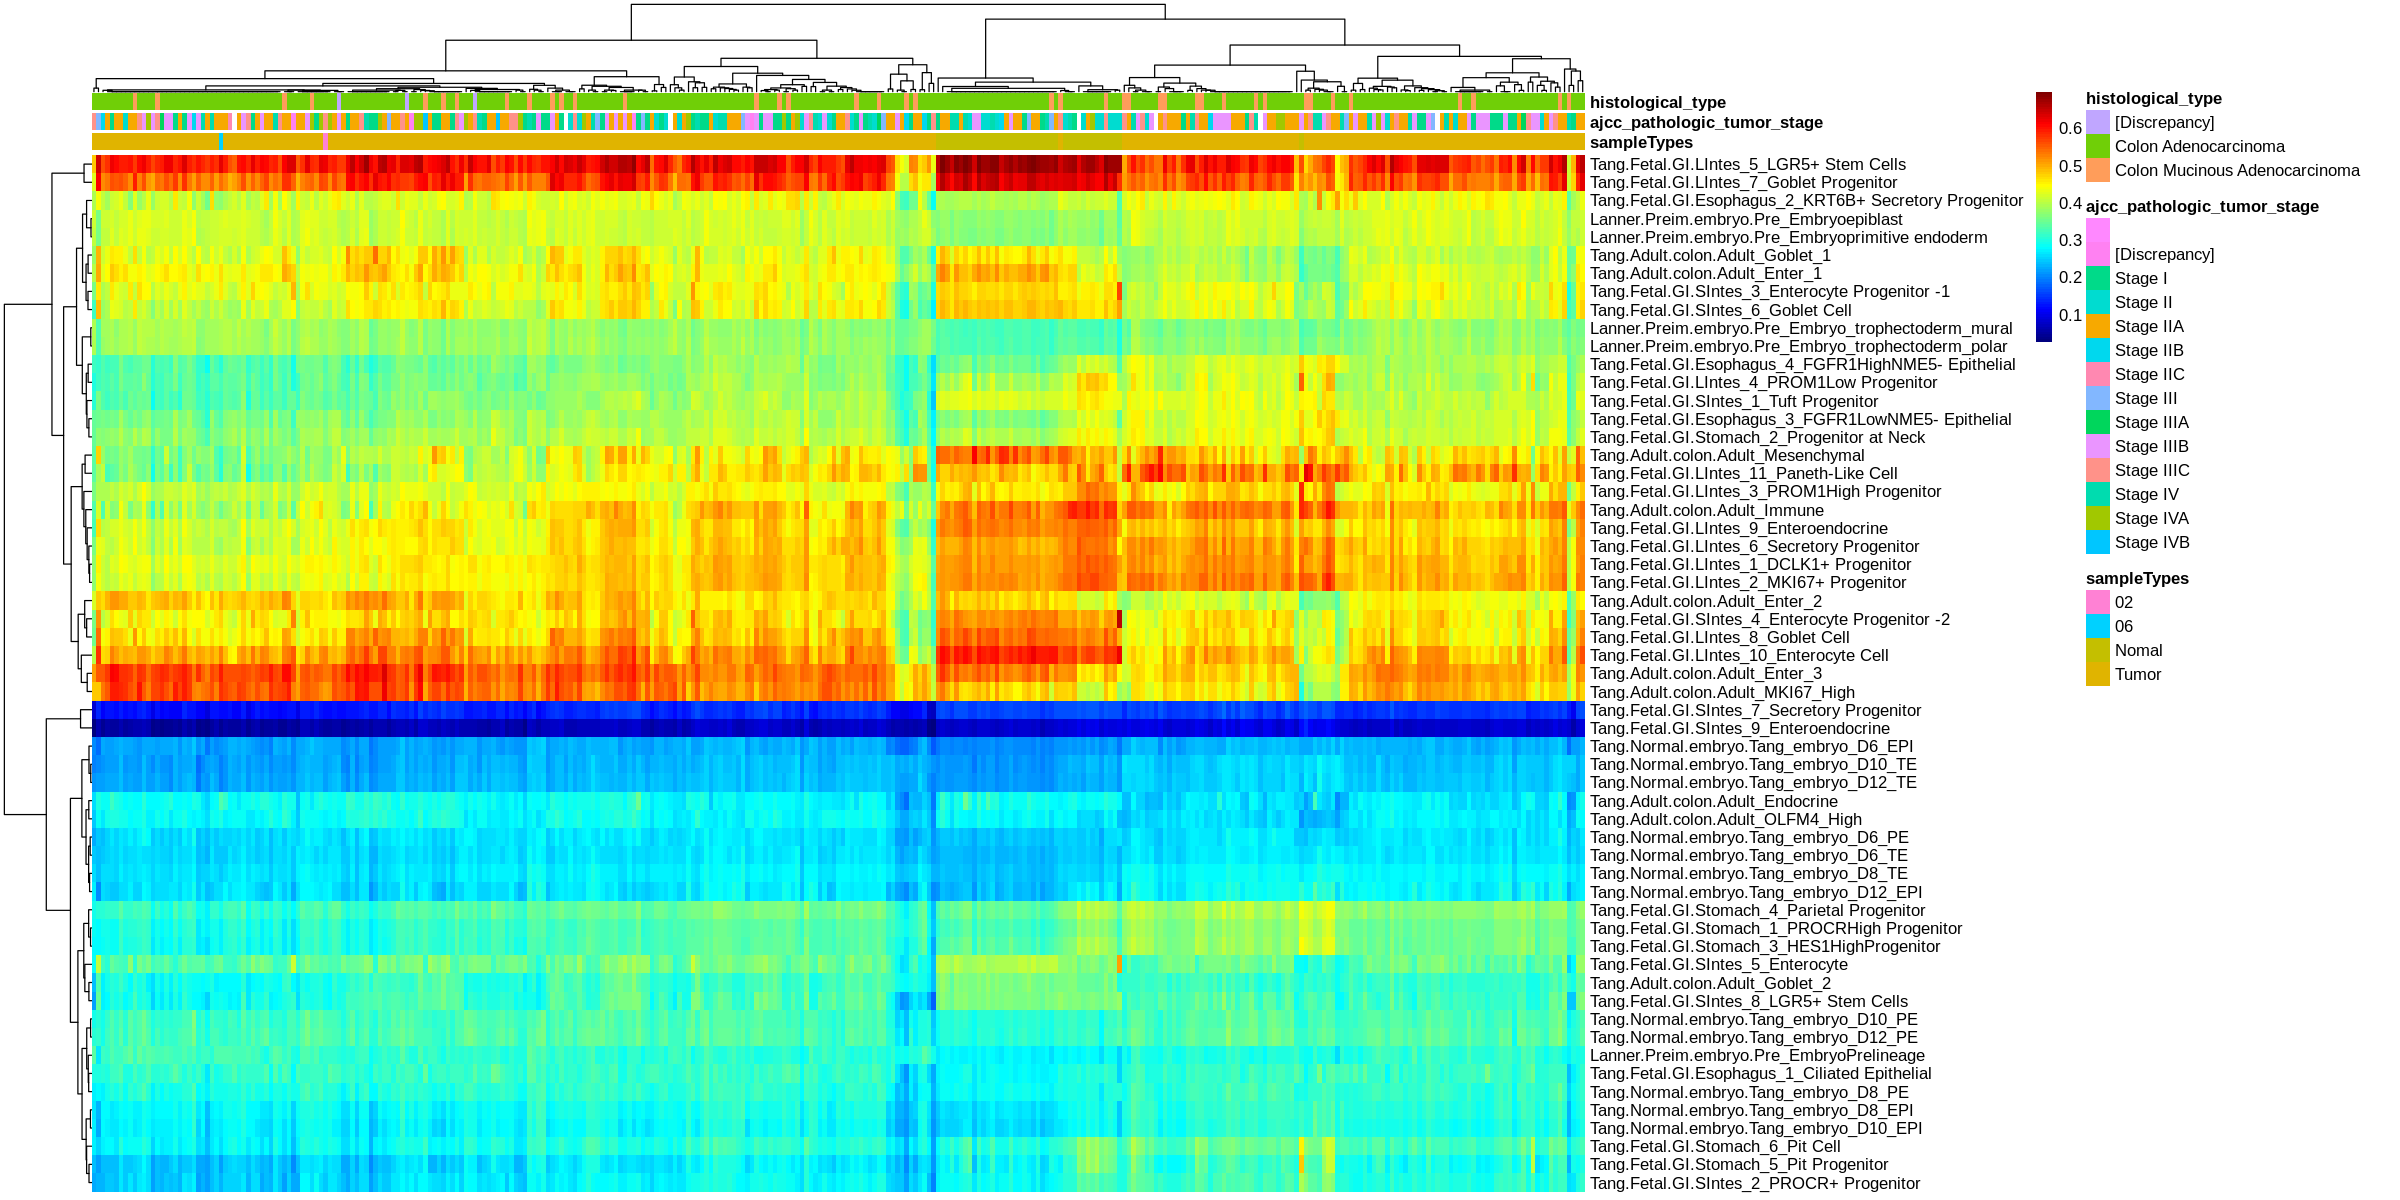

In [6]:
## cv8000 

source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
### Step2.Convert NA in matrix to 0
Cor.tumor <- Cor.Res.CV8000$Cor.merged
Pheno.merged.tumor <- COAD.pheno[,c("sampleTypes","ajcc_pathologic_tumor_stage","histological_type")]
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor)

Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, tab

Calculating consensus matrix...
Loading required package: pheatmap


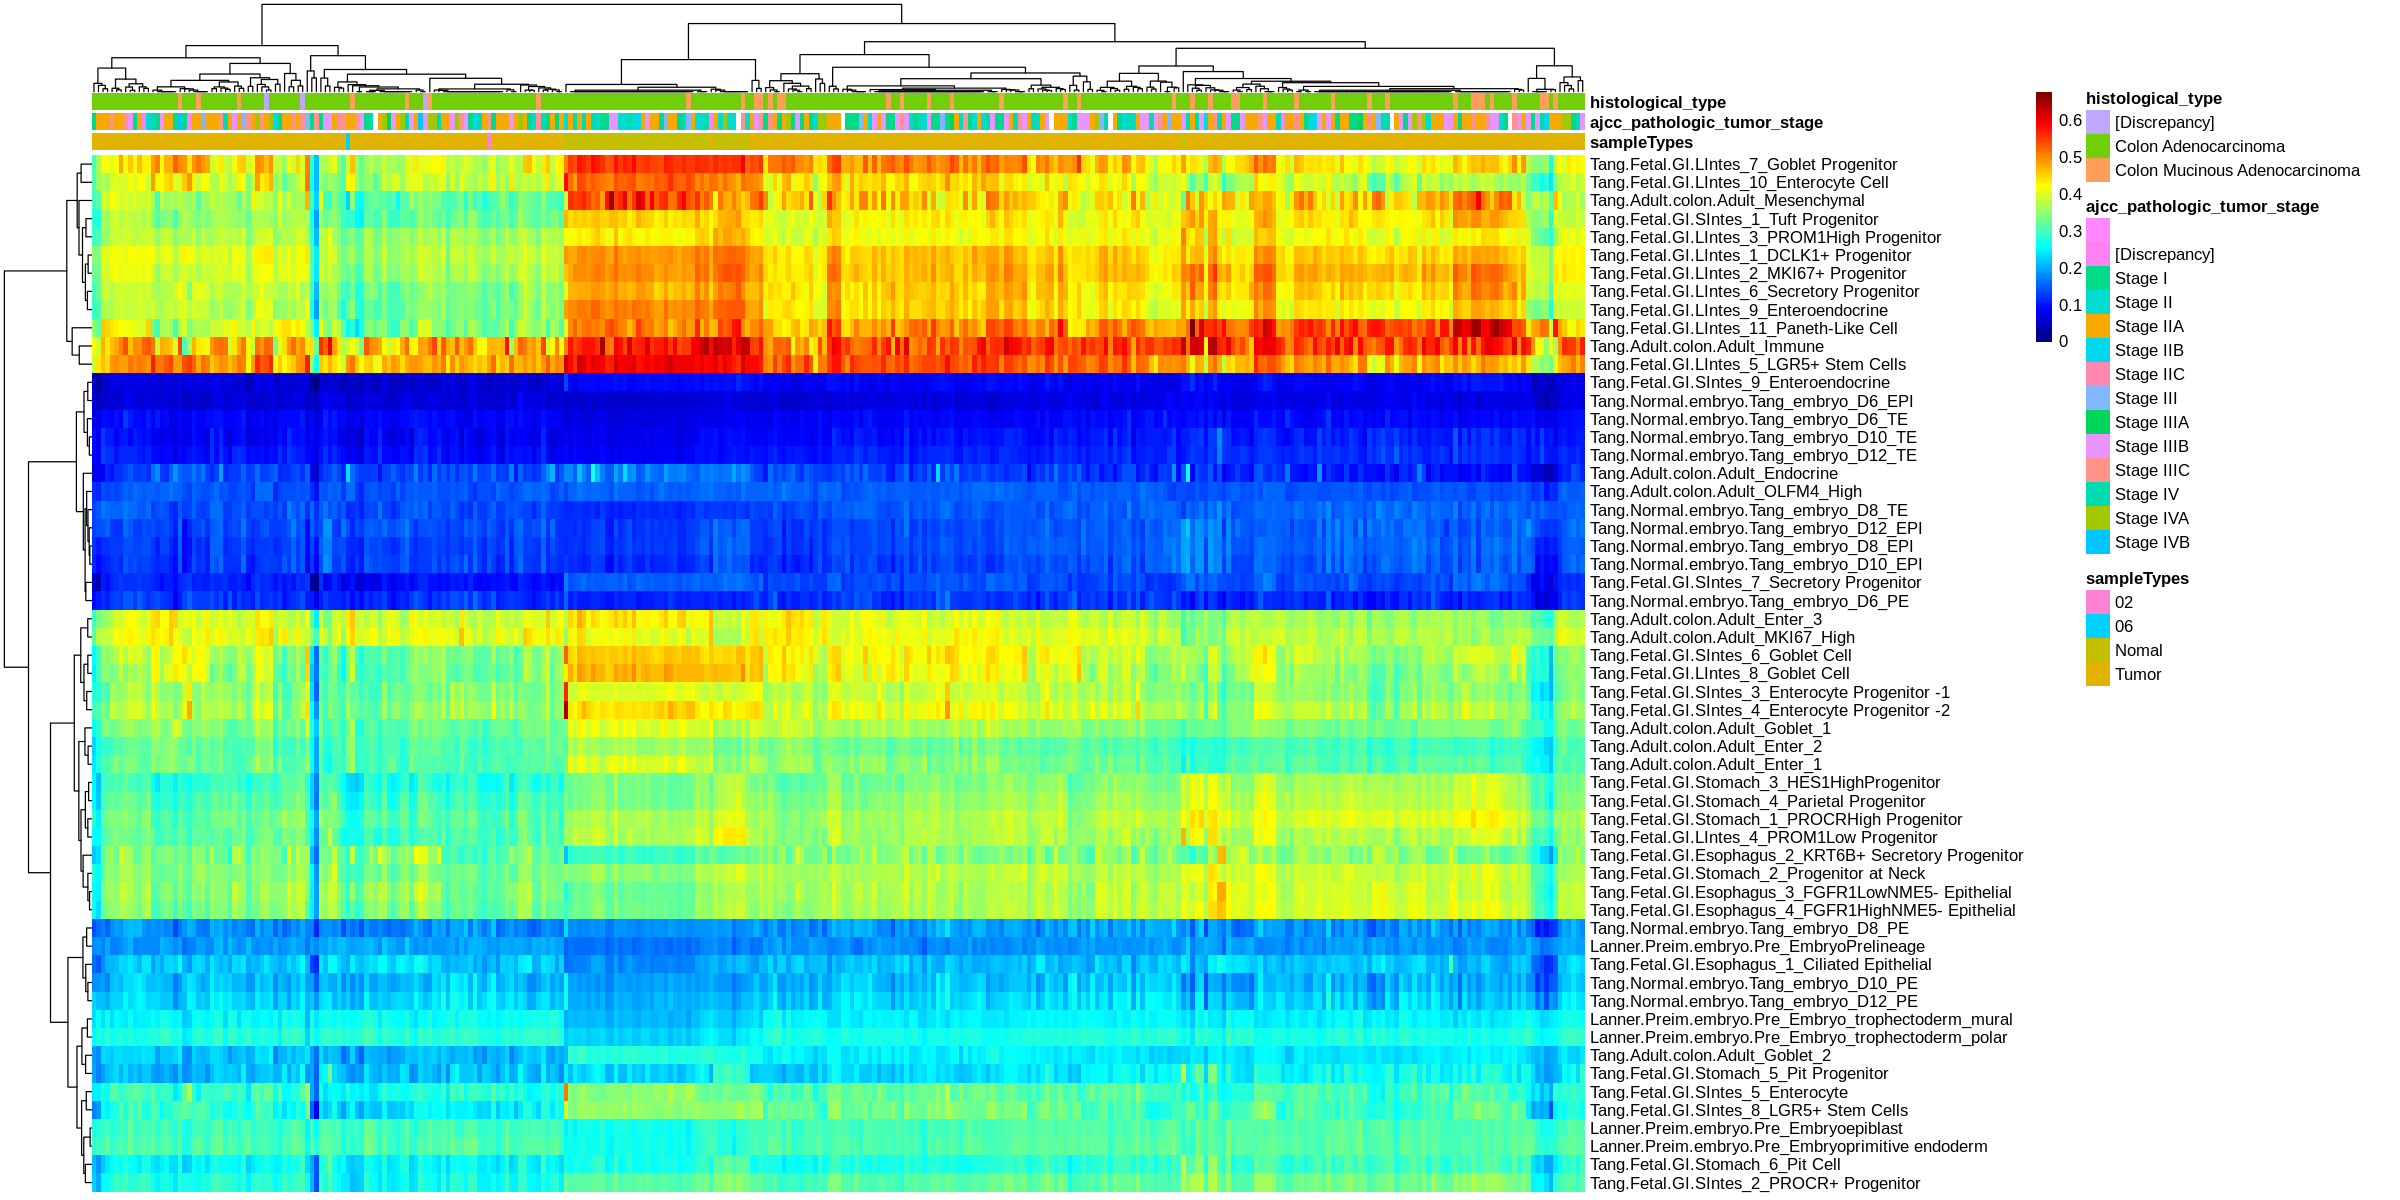

In [5]:
## cv4000 

source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
### Step2.Convert NA in matrix to 0
Cor.tumor <- Cor.Res.CV4000$Cor.merged
Pheno.merged.tumor <- COAD.pheno[,c("sampleTypes","ajcc_pathologic_tumor_stage","histological_type")]
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


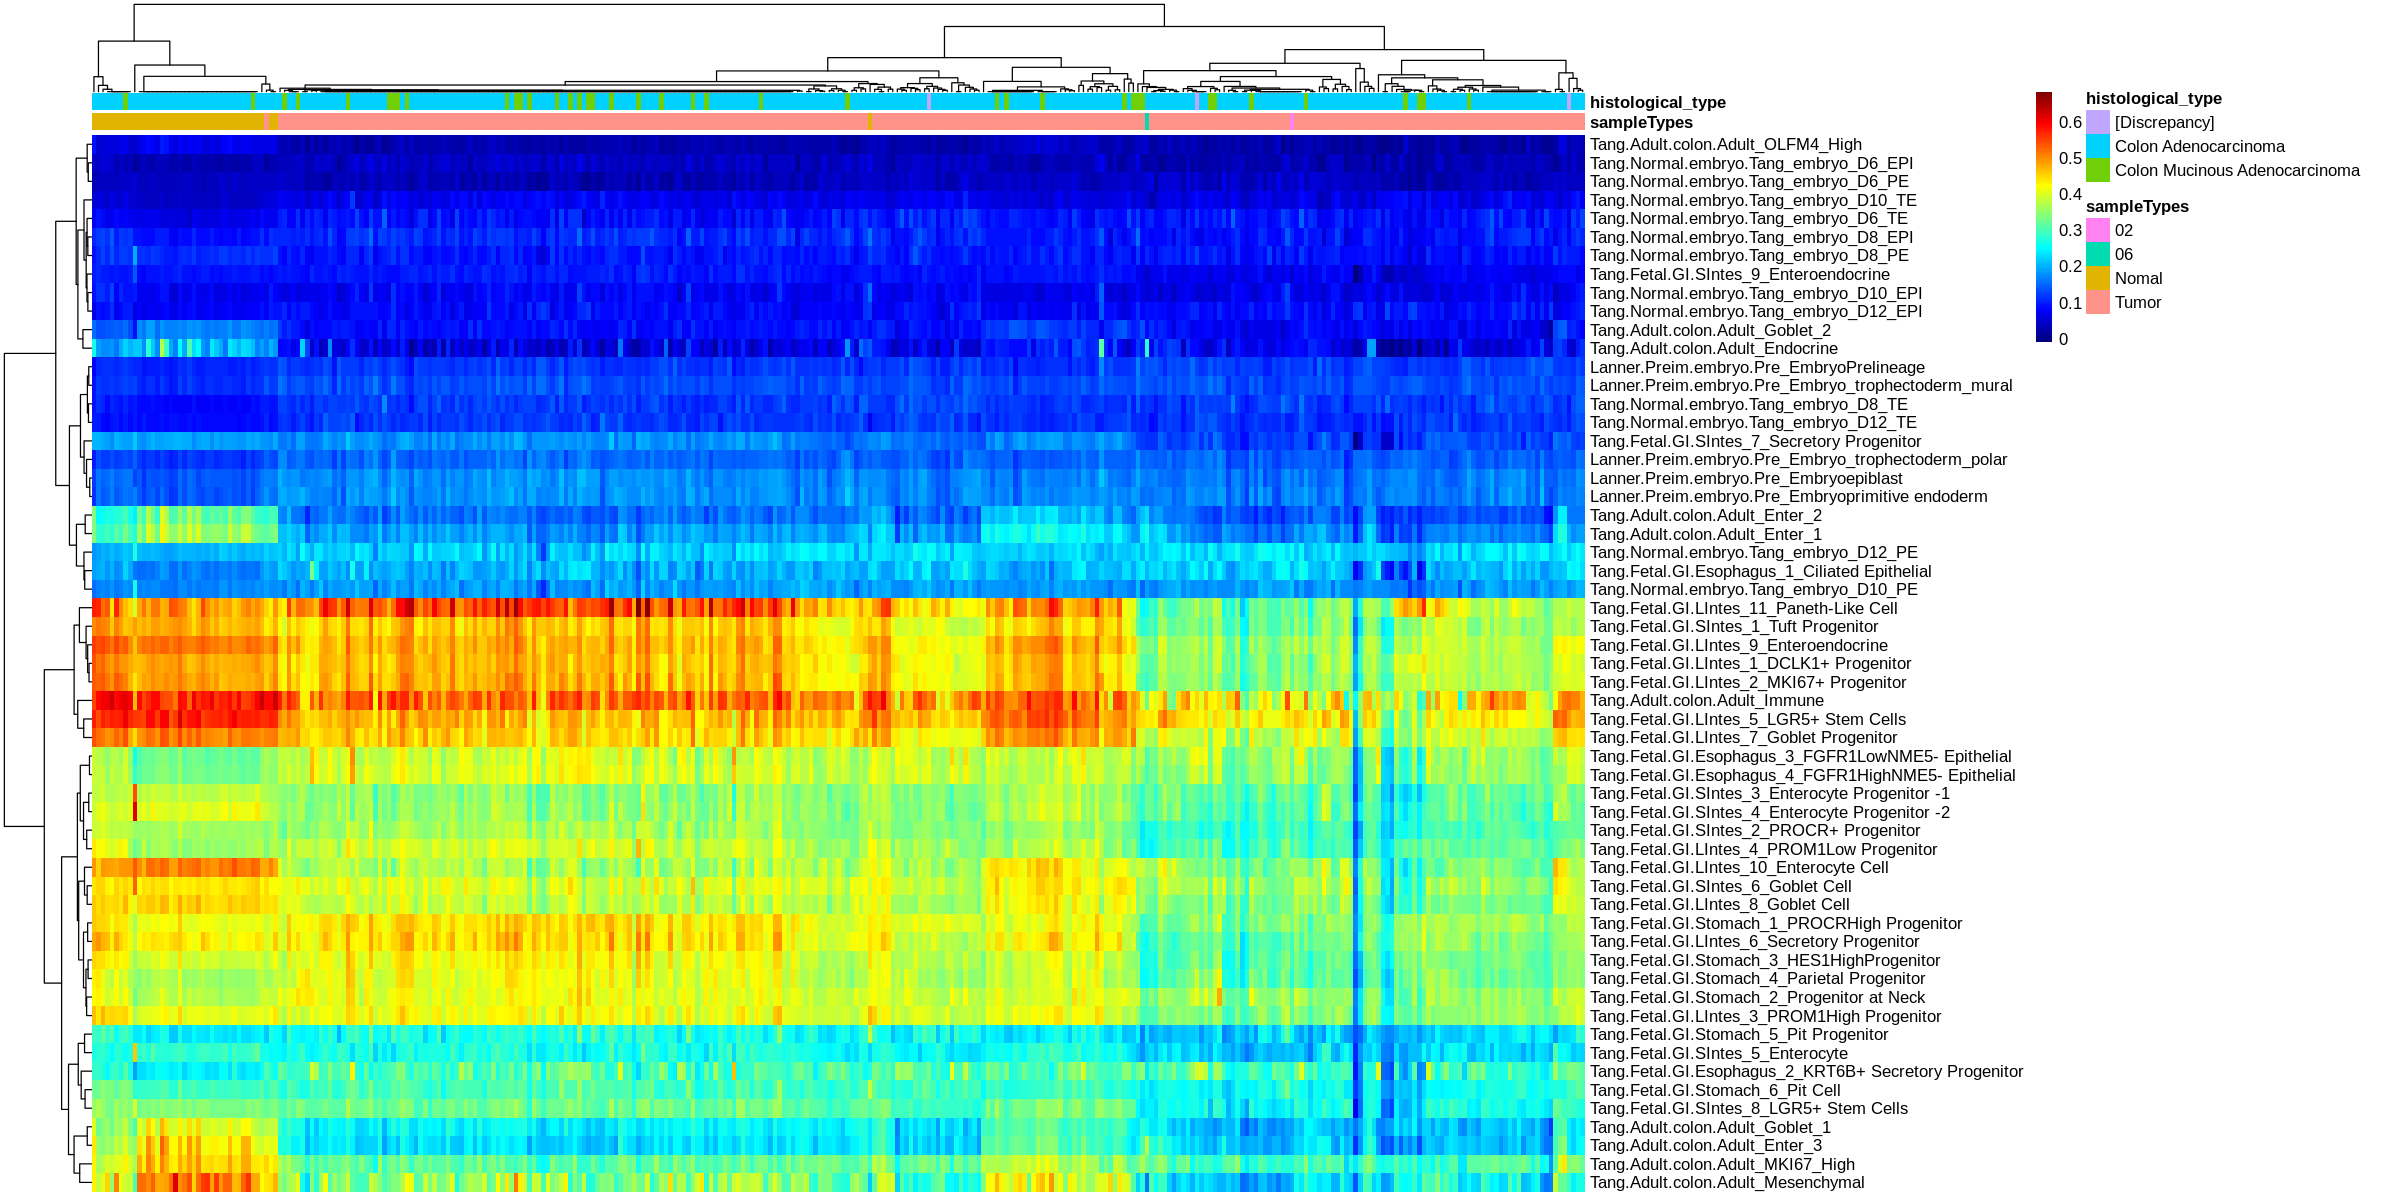

In [7]:
## cv2000 

source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
### Step2.Convert NA in matrix to 0
Cor.tumor <- Cor.Res.CV2000$Cor.merged
Pheno.merged.tumor <- COAD.pheno[,c("sampleTypes","histological_type")]
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


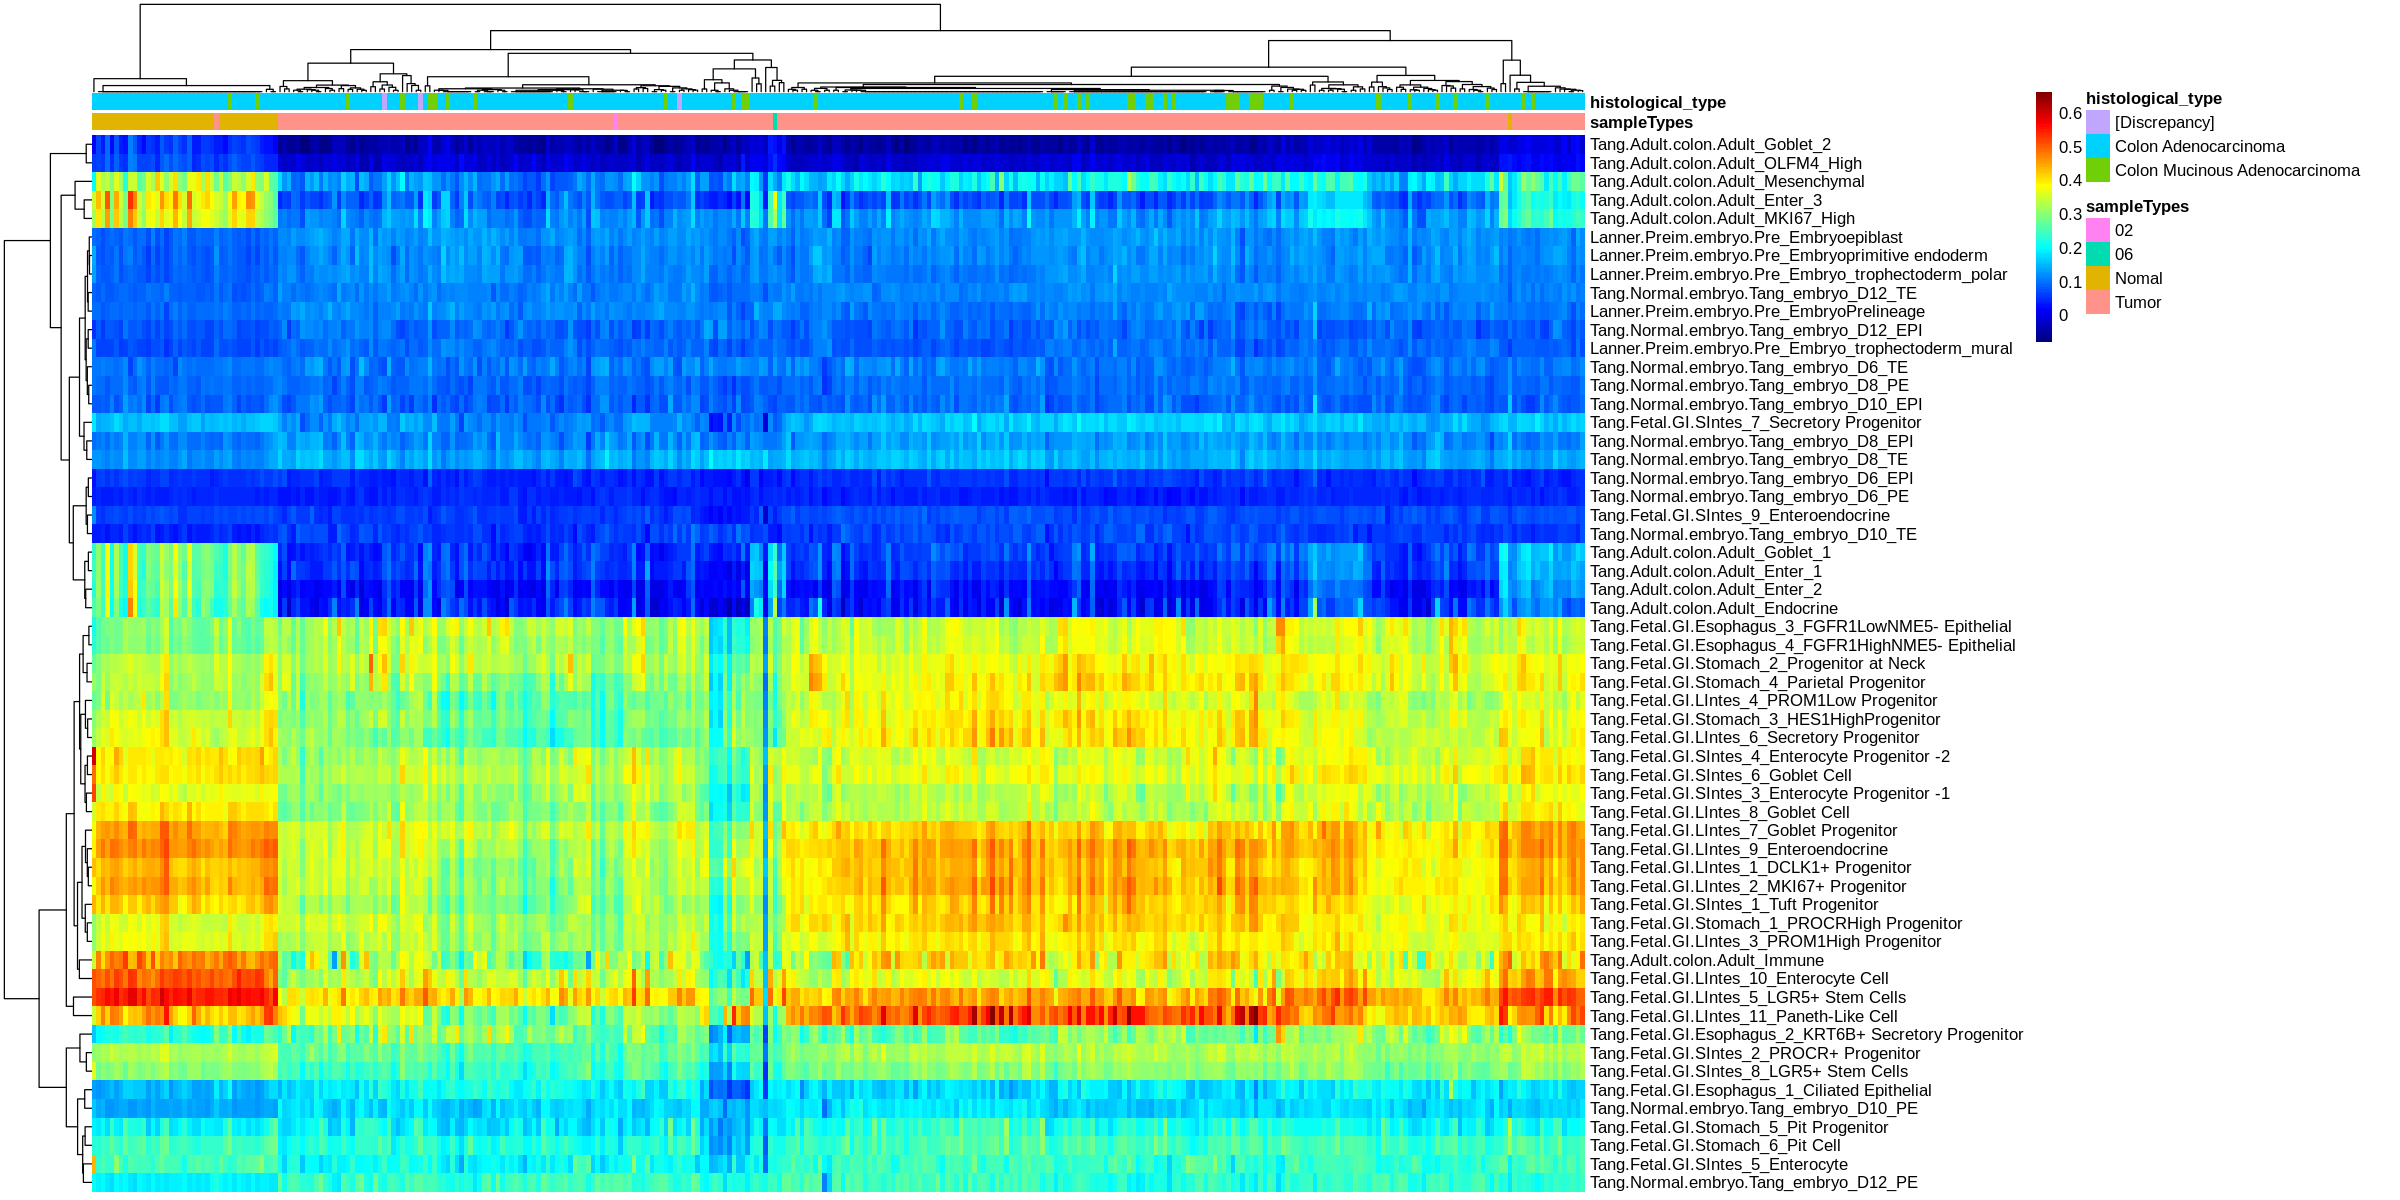

In [8]:
## cv1500 

source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
### Step2.Convert NA in matrix to 0
Cor.tumor <- Cor.Res.CV1500$Cor.merged
Pheno.merged.tumor <- COAD.pheno[,c("sampleTypes","histological_type")]
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor)

In [ ]:
## cv1000 

source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
### Step2.Convert NA in matrix to 0
Cor.tumor <- Cor.Res.CV1000$Cor.merged
Pheno.merged.tumor <- COAD.pheno[,c("sampleTypes","histological_type")]
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...
